In [8]:
import numpy as np
from scipy import integrate
from scipy.special import erf
import pylab as pl
%matplotlib inline
pl.style.use('latexplot')

In [2]:
# Defining the x-domain:
x_start = 0
x_end   = 50
N_x     = 1000
dx      = (x_end - x_start) / N_x

# Number of ghost cells:
N_g     = 1
x       = x_start + (0.5 + np.arange(-N_g, N_x + N_g)) * dx

In [3]:
# Defining the time array:
t_final = 100
N_t     = 401
t       = np.linspace(0, t_final, N_t)
dt      = t[1] - t[0]

In [4]:
# Defining the dimensionless concentration of species A:
a0 = x**0

In [5]:
D = 1

In [6]:
def da_dt(a, t):
    # Applying the boundary conditions:
    # Applying boundary condition that at x = 0, a = 0
    # This boundary condition is now applied at second order
    a[:N_g]  = -a[1]
    # Applying boundary condition that as x → ∞, a = 1
    a[-N_g:] = 1
    # Evaluating the 2nd derivative using central differences:
    d2a_dx2 = (np.roll(a, -1) + np.roll(a, 1) - 2 * a) / dx**2
    return d2a_dx2

In [7]:
from time_integrators import RK2, RK4, theta_scheme
# Checking spatial accuracy of implemented scheme:
N       = 500 * np.arange(1, 6)
err     = np.zeros(N.size)
# We test for a small time to check the spatial accuracy:
t_final = 1

for i in range(N.size):
    print(N[i])
    t   = np.array([0, dt]) #np.linspace(0, 5, N_t)
    dx  = (x_end - x_start) / int(N[i])
    x   = x_start + (0.5 + np.arange(-N_g, int(N[i]) + N_g)) * dx
    # Defining the initial concentration of species A:
    a0 = x**0
    dt = 1e-4
    t  = np.arange(0, t_final + dt, dt)
    a  = a0
    for j in range(1, t.size):
        a = RK4(da_dt, a, t[j] - dt, t[j])
    err[i] = np.mean(abs(a[N_g:-N_g] - erf(0.5 * x[N_g:-N_g] / np.sqrt(t[-1]))))

500
1000
1500
2000
2500


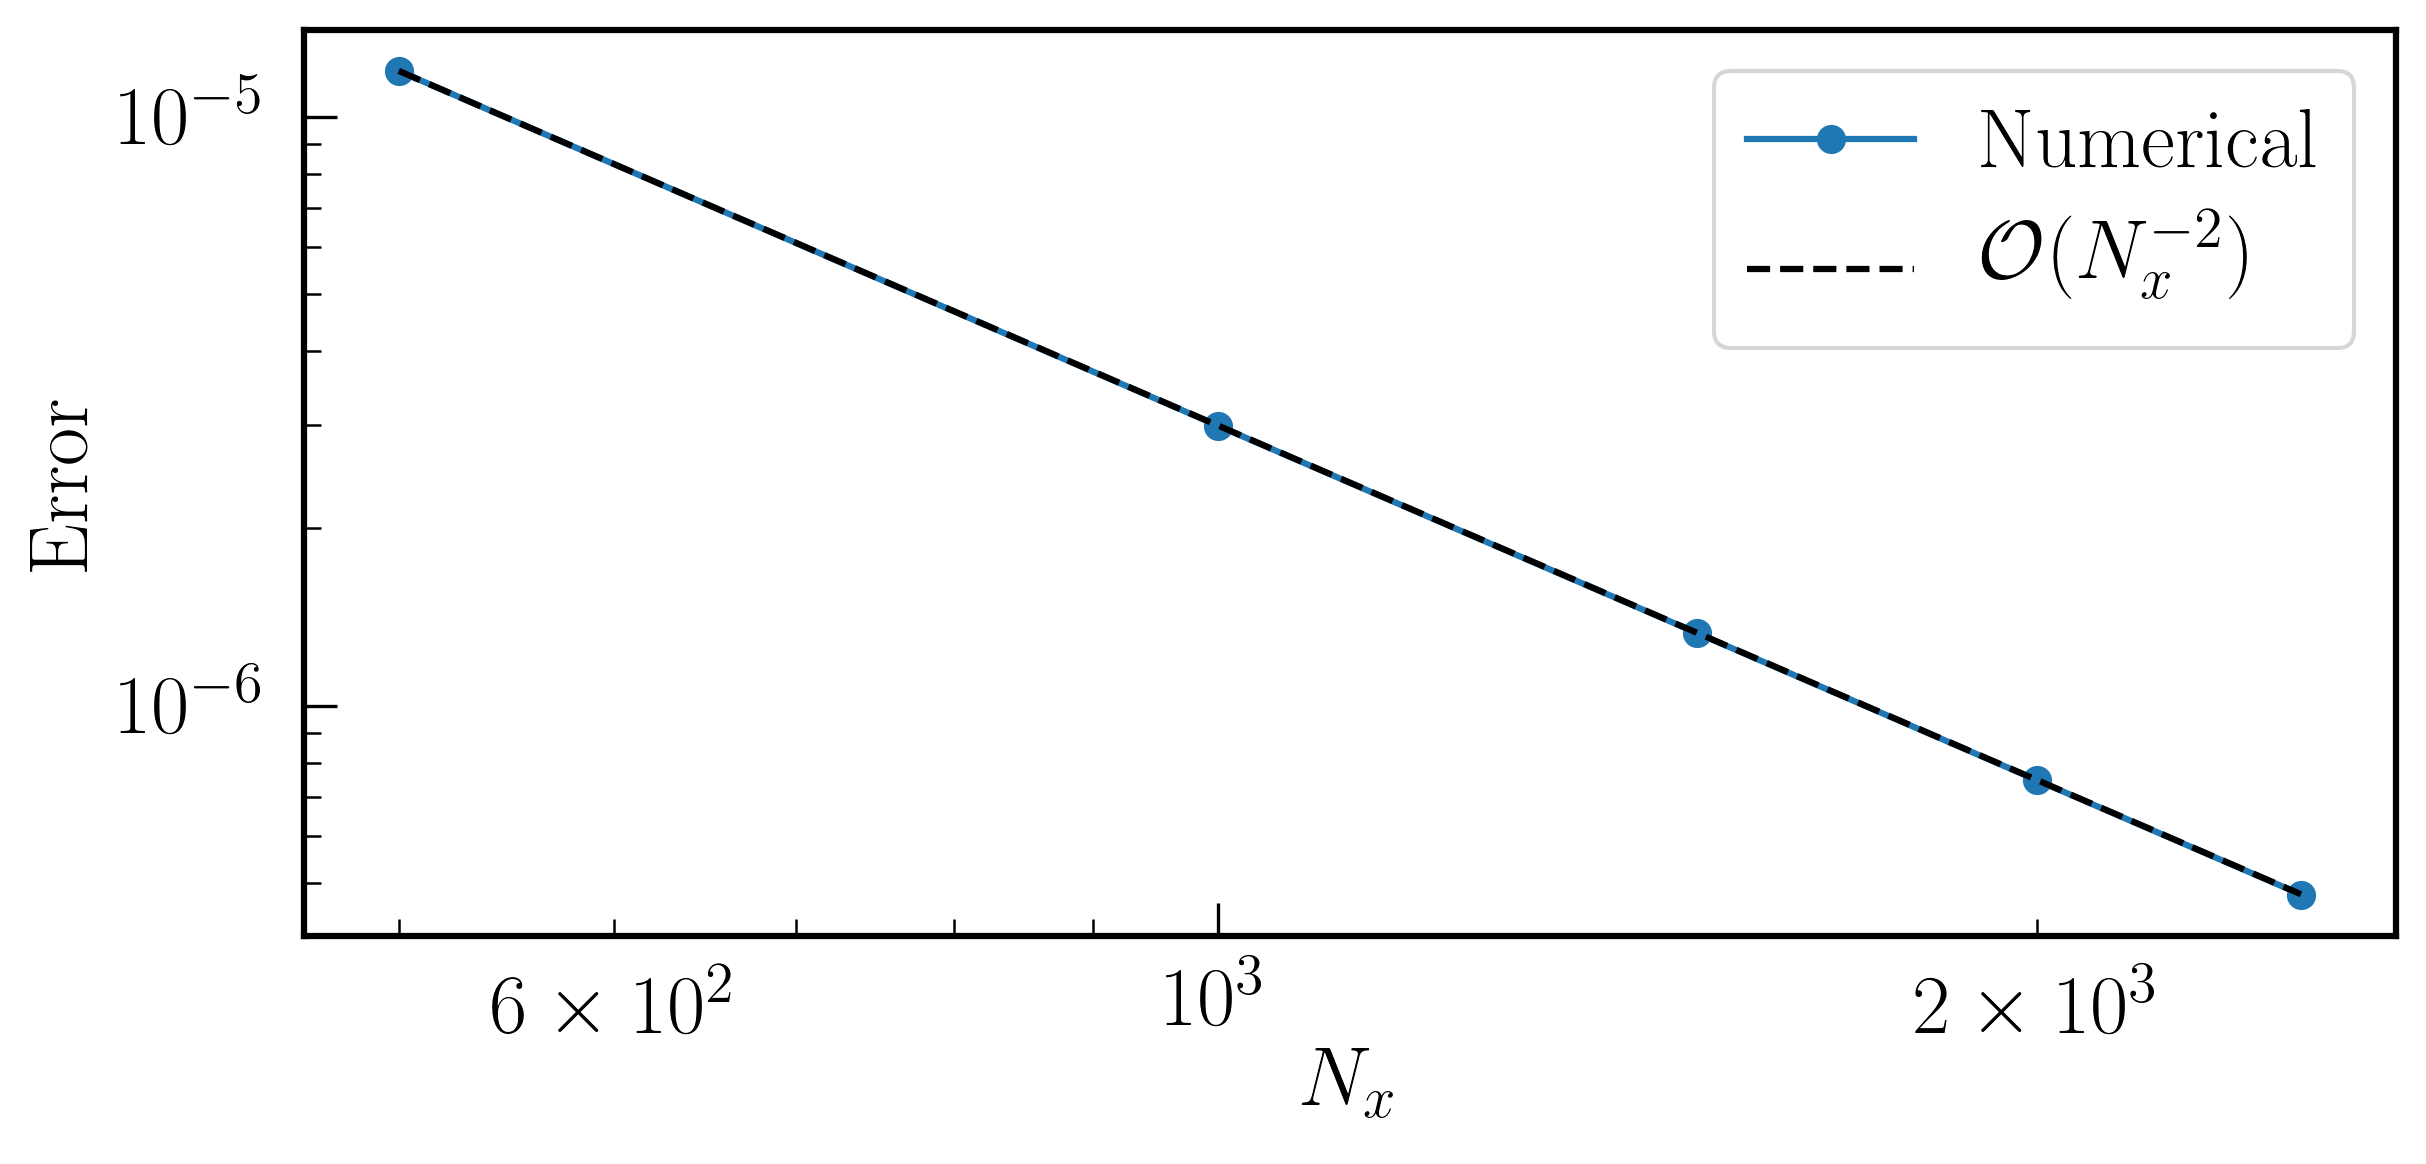

In [9]:
# Checking that the convergence behaviour is as we expect:
pl.loglog(N, err, '-o', label = 'Numerical')
pl.loglog(N, err[0] * N[0]**2/N**2, 'k--', label = r'$\mathcal{O}(N_x^{-2})$')
pl.legend(fontsize = 20)
pl.xlabel(r'$N_x$')
pl.ylabel('Error')
pl.savefig('spatial_convergence.png', bbox_inches = 'tight')